In [174]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [175]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [176]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [177]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [178]:
# reflect an existing database into a new model
db = automap_base()
# reflect the tables
db.prepare(engine, reflect=True)

In [179]:
# View all of the classes that automap found
db.classes.keys()

['measurement', 'station']

In [180]:
# Save references to each table
station = db.classes.station
measurement = db.classes.measurement

In [181]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [182]:
# Find the most recent date in the data set.
rd = (session.query(measurement.date).order_by(measurement.date.desc()).first())


In [183]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
lastyear = dt.date(2017,8,23) - dt.timedelta(days=365)
lastyear

datetime.date(2016, 8, 23)

In [184]:
# Perform a query to retrieve the data and precipitation scores
ly_prcp=(session.query(measurement.date,func.max(measurement.prcp)).filter(func.strftime('%Y-%m-%d',measurement.date) > lastyear).group_by(measurement.date).all())
ly_prcp

[('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.81),
 ('2016-10-06', 0.

In [185]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(ly_prcp, columns=["date","prcp"])
df.set_index("date", inplace=True)
df

,prcp
date,
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


In [186]:
# Sort the dataframe by date
df = df.sort_values('date')
df

,prcp
date,
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


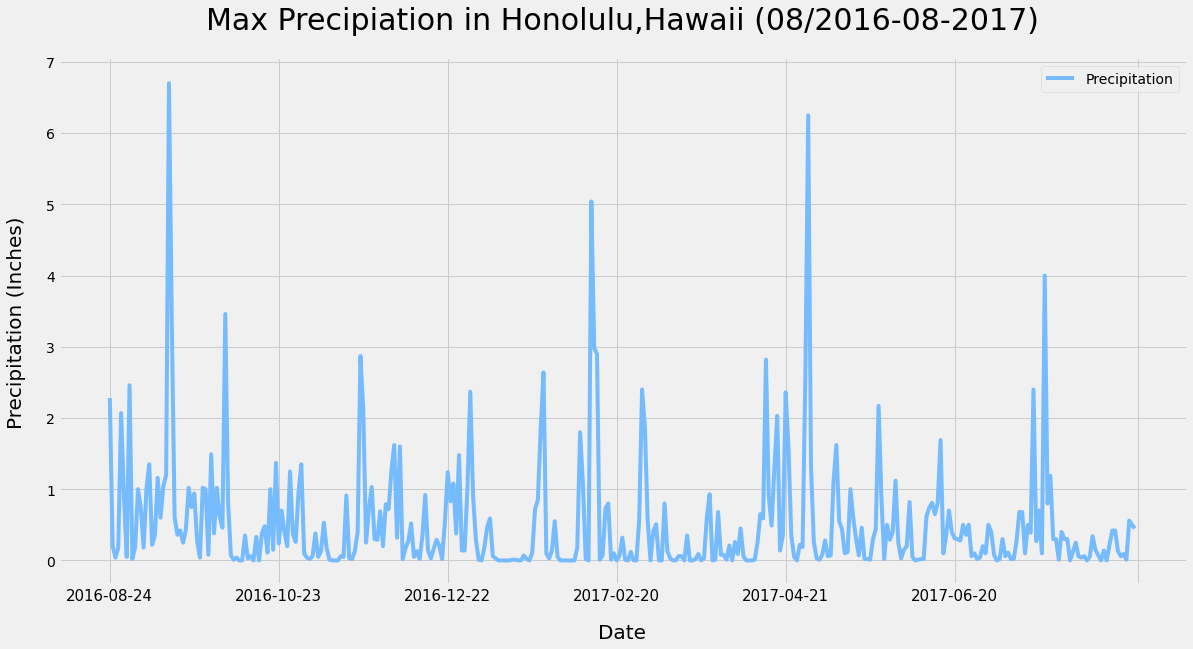

In [189]:
# Use Pandas Plotting with Matplotlib to plot the data
from matplotlib.pylab import rcParams
df.plot(xticks=(0,60,120,180,240,300,365), 
        color="xkcd:sky blue")
rcParams['figure.figsize'] = 15,7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
L=plt.legend()
L.get_texts()[0].set_text('Precipitation')
plt.xlabel("Date",labelpad=20, fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Precipitation (Inches)", labelpad=20, fontsize=20)
plt.title("Max Precipiation in Honolulu,Hawaii (08/2016-08-2017)", fontsize=30, pad=30)
plt.savefig("Images/precipitation.png")
plt.show();

In [190]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,365.000000
mean,0.517288
std,0.829196
min,0.000000
25%,0.040000
50%,0.250000
75%,0.650000
max,6.700000


# Exploratory Station Analysis

In [191]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(station).count()
stations

9

In [192]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = (session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all())
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [193]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs=[measurement.station,func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)]
most_active=(session.query(*tobs).filter(measurement.station=='USC00519281').all())
most_active

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [194]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_ly = (session.query(measurement.date,(measurement.tobs)).filter(func.strftime('%Y-%m-%d',measurement.date) > lastyear).filter(measurement.station=='USC00519281').all())
most_active_ly

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [195]:
df = pd.DataFrame(most_active_ly)
df.set_index("date", inplace=True)
df

,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


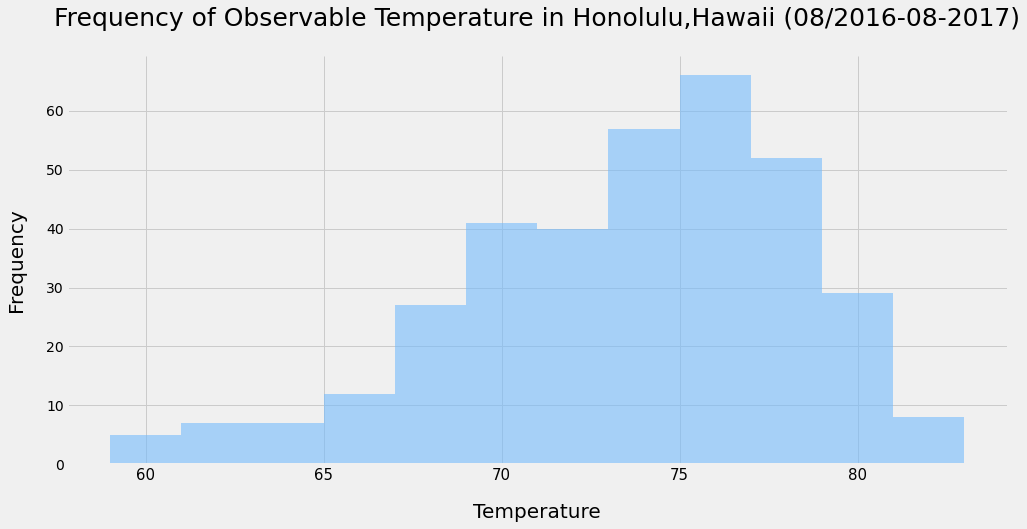

In [196]:
df.hist(bins=12, color="xkcd:sky blue",alpha=0.6)
rcParams['figure.figsize'] = 14,6
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.xlabel("Temperature",labelpad=20, fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Frequency", labelpad=20, fontsize=20)
plt.title("Frequency of Observable Temperature in Honolulu,Hawaii (08/2016-08-2017)", fontsize=25, pad=30)
plt.savefig("Images/station-histogram.png")
plt.show();

# Close session

In [197]:
# Close Session
session.close()